<a href="https://colab.research.google.com/github/samriddh202/IIIT_Internship_Code/blob/main/CNN_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing CNN using Different Dataset**


## **MNIST FASHION DATA SET**


Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Importing data set

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Looking at the data set

In [ ]:
#train_images.shape
#train_labels
#test_images.shape
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Normalization of the data

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Looking at the images and labels of the data set

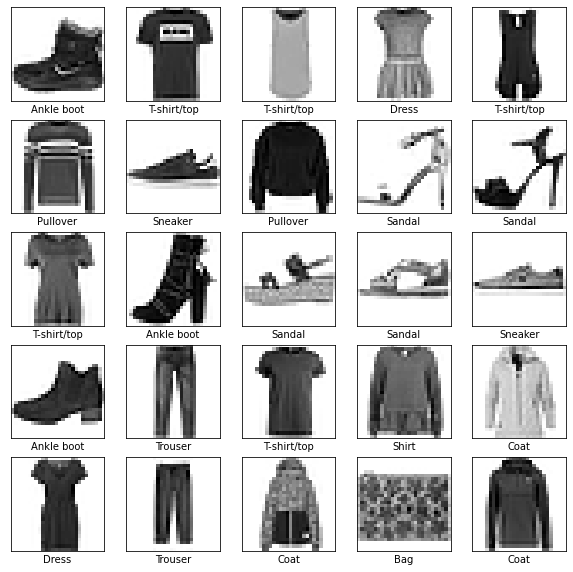

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels,
           batch_size=100, epochs=50,
          verbose=2,
          validation_data=(test_images, test_labels))

Epoch 1/50
600/600 - 2s - loss: 0.5199 - accuracy: 0.8166 - val_loss: 0.4265 - val_accuracy: 0.8451
Epoch 2/50
600/600 - 2s - loss: 0.3728 - accuracy: 0.8649 - val_loss: 0.4141 - val_accuracy: 0.8574
Epoch 3/50
600/600 - 2s - loss: 0.3375 - accuracy: 0.8760 - val_loss: 0.3947 - val_accuracy: 0.8530
Epoch 4/50
600/600 - 2s - loss: 0.3149 - accuracy: 0.8844 - val_loss: 0.3674 - val_accuracy: 0.8685
Epoch 5/50
600/600 - 2s - loss: 0.2966 - accuracy: 0.8901 - val_loss: 0.3570 - val_accuracy: 0.8710
Epoch 6/50
600/600 - 2s - loss: 0.2790 - accuracy: 0.8961 - val_loss: 0.3473 - val_accuracy: 0.8720
Epoch 7/50
600/600 - 2s - loss: 0.2668 - accuracy: 0.9007 - val_loss: 0.3384 - val_accuracy: 0.8760
Epoch 8/50
600/600 - 2s - loss: 0.2577 - accuracy: 0.9035 - val_loss: 0.3350 - val_accuracy: 0.8853
Epoch 9/50
600/600 - 2s - loss: 0.2459 - accuracy: 0.9079 - val_loss: 0.3290 - val_accuracy: 0.8852
Epoch 10/50
600/600 - 2s - loss: 0.2356 - accuracy: 0.9117 - val_loss: 0.3587 - val_accuracy: 0.8776

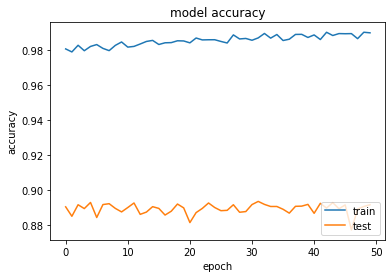

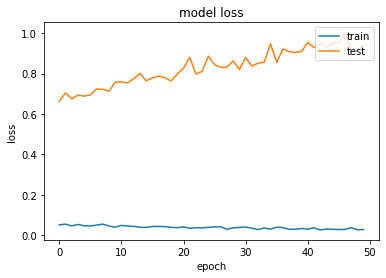

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
loss_and_metrics = model.evaluate(test_images, test_labels, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 0s - loss: 0.9438 - accuracy: 0.8917
Test Loss 0.9438046813011169
Test Accuracy 0.891700029373169


In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)
predictions[0]

array([1.7252437e-14, 6.5364700e-11, 1.1426199e-14, 7.5916880e-14,
       1.0293484e-16, 1.9621831e-09, 7.1278825e-14, 8.0939526e-06,
       6.4503599e-14, 9.9999189e-01], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

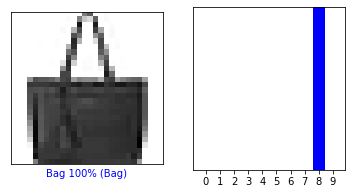

In [ ]:
i = 900
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

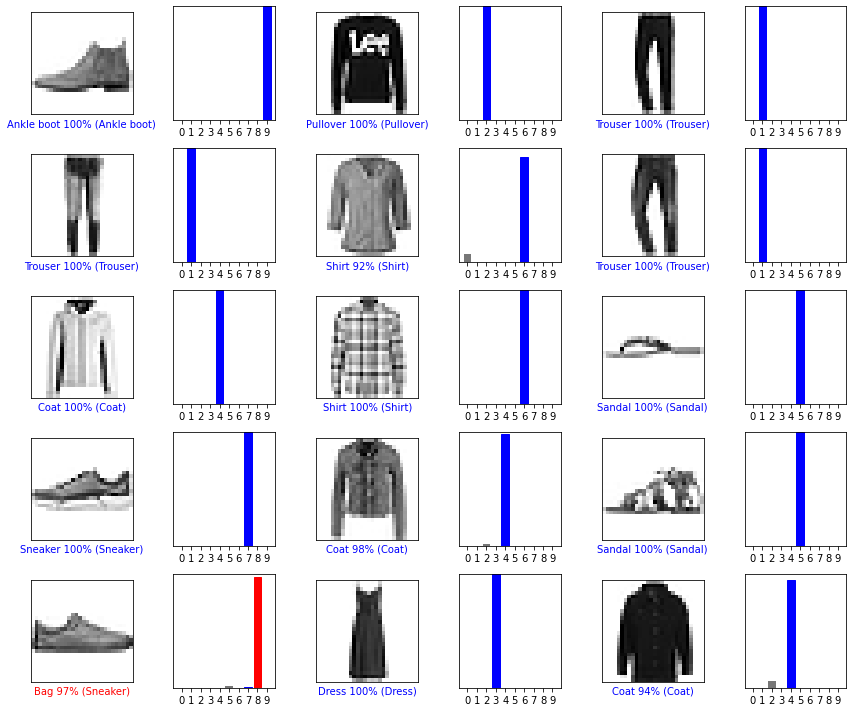

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## **CIFAR-10**

Loading Libraries

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


Loading data set and checking the size

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 5s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


Normalization and hot encoding

In [ ]:

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
type(x_train)



numpy.ndarray

Creating model

In [ ]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

Compiling model and training

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
              batch_size=100,
              epochs=10,
              validation_data=(x_test, y_test))

Epoch 1/10
500/500 [==============================] - 215s 430ms/step - loss: 1.8923 - accuracy: 0.3096 - val_loss: 1.6248 - val_accuracy: 0.4162
Epoch 2/10
500/500 [==============================] - 221s 441ms/step - loss: 1.6181 - accuracy: 0.4134 - val_loss: 1.4729 - val_accuracy: 0.4753
Epoch 3/10
500/500 [==============================] - 215s 431ms/step - loss: 1.5011 - accuracy: 0.4560 - val_loss: 1.3999 - val_accuracy: 0.4988
Epoch 4/10
500/500 [==============================] - 222s 444ms/step - loss: 1.4237 - accuracy: 0.4860 - val_loss: 1.3345 - val_accuracy: 0.5272
Epoch 5/10
500/500 [==============================] - 217s 435ms/step - loss: 1.3647 - accuracy: 0.5117 - val_loss: 1.3049 - val_accuracy: 0.5408
Epoch 6/10
500/500 [==============================] - 219s 438ms/step - loss: 1.3105 - accuracy: 0.5324 - val_loss: 1.2094 - val_accuracy: 0.5725
Epoch 7/10
500/500 [==============================] - 217s 434ms/step - loss: 1.2638 - accuracy: 0.5511 - val_loss: 1.1710 -

Loss function and accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


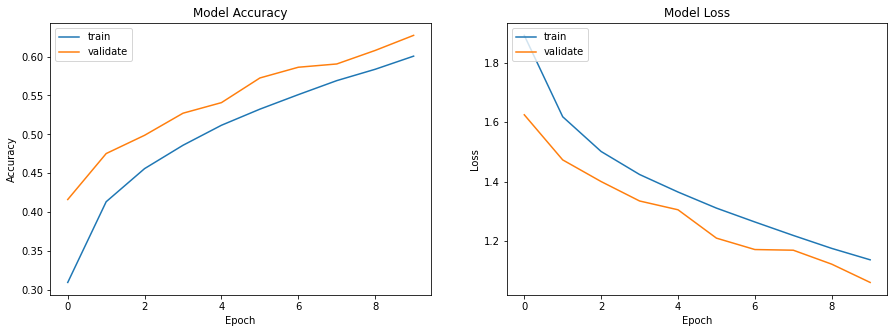

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 

    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()


print(history.history.keys())

plotmodelhistory(history)

Test and Accuracy value

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


pred = model.predict(x_test)

313/313 [==============================] - 10s 33ms/step - loss: 1.0602 - accuracy: 0.6273
Test loss: 1.0602309703826904
Test accuracy: 0.6273000240325928


## **Cat VS Dog**

In [ ]:
from google.colab import drive
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import random
import os

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


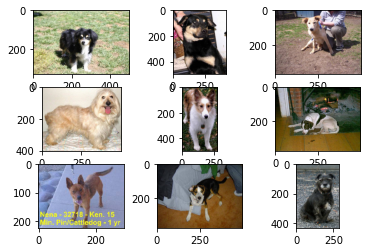

In [ ]:
training_path='/content/drive/My Drive/cat vs dog/train/train/'
test_path='/content/drive/My Drive/cat vs dog/test1/test1/'

# images of Dogs
for i in range(9):
	plt.subplot(330 + 1 + i)
	filename = training_path + 'dog.' + str(i+20) + '.jpg'
	image = mpimg.imread(filename)
	plt.imshow(image)

plt.show()

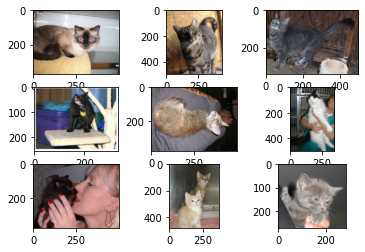

In [ ]:
# images of cats
for i in range(9):
	plt.subplot(330 + 1 + i)
	filename = training_path + 'cat.' + str(i+20) + '.jpg'
	image = mpimg.imread(filename)
	plt.imshow(image)

plt.show()

In [ ]:
filenames = os.listdir('/content/drive/My Drive/cat vs dog/train/train/')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df.head()


,filename,category
0,dog.962.jpg,1
1,dog.9619.jpg,1
2,dog.9605.jpg,1
3,dog.9603.jpg,1
4,dog.9585.jpg,1


In [ ]:
df.tail()

,filename,category
25089,cat.10201.jpg,0
25090,cat.10189.jpg,0
25091,cat.10218.jpg,0
25092,cat.1020.jpg,0
25093,cat.10181.jpg,0


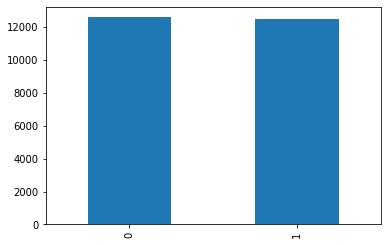

In [ ]:
df['category'].value_counts().plot.bar()

In [ ]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

train_df=train_df.sample(n=1000)
validate_df=validate_df.sample(n=1000)

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    '/content/drive/My Drive/cat vs dog/train/train/', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    '/content/drive/My Drive/cat vs dog/train/train/', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 100 validated image filenames belonging to 2 classes.


In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/50
7/7 [==============================] - 101s 14s/step - loss: 0.3631 - accuracy: 0.8600 - val_loss: 1.2920 - val_accuracy: 0.5600
Epoch 2/50
7/7 [==============================] - 6s 798ms/step - loss: 0.3418 - accuracy: 0.8600 - val_loss: 0.9583 - val_accuracy: 0.6100
Epoch 3/50
7/7 [==============================] - 6s 796ms/step - loss: 0.1294 - accuracy: 0.9500 - val_loss: 1.3021 - val_accuracy: 0.5700
Epoch 4/50
7/7 [==============================] - 6s 798ms/step - loss: 0.2080 - accuracy: 0.9100 - val_loss: 1.7460 - val_accuracy: 0.5300
Epoch 5/50
7/7 [==============================] - 6s 799ms/step - loss: 0.2115 - accuracy: 0.9100 - val_loss: 2.2144 - val_accuracy: 0.5100
Epoch 6/50
7/7 [==============================] - 6s 791ms/step - loss: 0.4510 - accuracy: 0.8200 - val_loss: 2.3344 - val_accuracy: 0.5200
Epoch 7/50
7/7 [==============================] - 6s 820ms/step - loss: 0.1917 - accuracy: 0.9500 - val_loss: 1.6396 - val_accuracy: 0.5300
Epoch 8/50
7/7 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


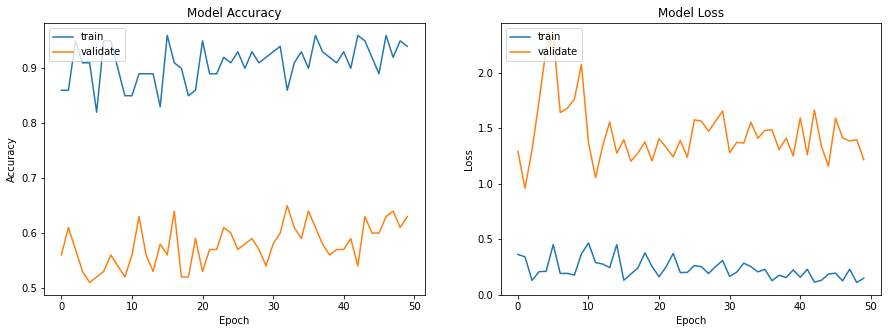

In [ ]:

def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 

    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')

    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()


print(history.history.keys())

plotmodelhistory(history)


In [ ]:
scores = model.evaluate(validation_generator, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


pred = model.predict(validation_generator)

7/7 [==============================] - 1s 130ms/step - loss: 1.2158 - accuracy: 0.6300
Test loss: 1.2157765626907349
Test accuracy: 0.6299999952316284
